In [1]:
!pip install youtube_transcript_api 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.8 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import torch
import spacy
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModel
from youtube_transcript_api import YouTubeTranscriptApi
from nltk.tokenize import sent_tokenize
from urllib.parse import urlparse, parse_qs
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Abstractive summarizer
summarizer = pipeline('summarization')

def extract_video_id(url):
    parsed_url = urlparse(url)
    if parsed_url.netloc == "youtu.be":
        return parsed_url.path[1:]
    elif "youtube.com" in parsed_url.netloc:
        return parse_qs(parsed_url.query).get("v", [None])[0]
    return None

def get_transcript(video_id):
    try:
        transcript_list = YouTubeTranscriptApi.get_transcript(video_id)
        return ' '.join([d['text'] for d in transcript_list])
    except Exception as e:
        print("Error:", e)
        return None

def abstractive_summarization(transcript, max_length=150):
    summary = ''
    for i in range(0, max(1, len(transcript)//1000 + 1)):
        chunk = transcript[i * 1000:(i+1) * 1000]
        summary += summarizer(chunk, max_length=max_length)[0]['summary_text'] + ' '
    return summary.strip()

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
#https://youtu.be/ZhAz268Hdpw  --- Transformers
#https://youtu.be/S7YoP9JFtJo --- fault_analysis
#https://youtu.be/ELOEyh086DQ?si=HTVwpQRyQum2B9Bw ---- praveen

In [4]:
video_url = "https://youtu.be/ELOEyh086DQ?si=HTVwpQRyQum2B9Bw"
video_id = extract_video_id(video_url)

if not video_id:
    print("Invalid YouTube URL")
else:
    transcript = get_transcript(video_id)


In [5]:
print(len(transcript))

38601


In [7]:
summary = abstractive_summarization(transcript, max_length=150)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 150, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)


In [10]:
summary

"Hello friends. Ah today, we are going to uhdiscuss about ah crystal planes and directions, ah how we can index them ah and in hexagonal system cubic system and so on and what is the procedure of indexing . So, basically if you want to make a uh a can, for example, beverage cans the Coca-Cola or Pepsi cans which you use are all deep drawing ah made by deep drawing operation and .  There will be because there are different type of deformation at different part of the cup, ah you will have thinning of material at certain point and at another point there will be a thick sheet . So, which is not a good thing and we will not be able to design any of our part properly if there is thickness difference .  In bcc materials or bcc crystals, 1 0 0 direction is the easy magnetization direction; that means, you can easily have magnetization and you can understand 50 times, it has to .magnetize demagnetize . So, with each cycle, there will be a hysteresis loop and for in each hystereresis . loop, th

In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# def chunk_text_by_length(text, max_length=350):
#     chunks = []
#     for i in range(0, len(text), max_length):
#         chunk = text[i:i+max_length]
#         chunks.append(chunk.strip())
#     return chunks

transcript_chunks = sent_tokenize(summary)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
len(transcript_chunks)

144

In [16]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 89.8 MB/s eta 0:00:00


## PDF Extraction

In [17]:
import os
import pdfplumber

def extract_text_from_pdf(pdf_path):
    """Extract text from a single PDF."""
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text.strip()

In [18]:
pdf_path ="/kaggle/input/evaluation-data-3/praveen1.pdf"
text = extract_text_from_pdf(pdf_path)

In [19]:
len(text)

29491

In [20]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

pdf_chunks = sent_tokenize(text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
len(pdf_chunks)

215

In [22]:
pdf_chunks.extend(transcript_chunks)

In [23]:
len(pdf_chunks)

359

In [32]:
total_text = text+summary

In [33]:
import spacy
from spacy.language import Language

nlp = spacy.load("en_core_web_sm")

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ":":
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe("set_custom_boundaries", before="parser")
doc = nlp(total_text)
sentences2 = []
for sent in doc.sents:
    sentences2.append(sent)

In [34]:
len(sentences2)

401

In [24]:
type(pdf_chunks)

list

## Semantic Chunking

In [42]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize
# sentences = sent_tokenize(all_text)

sentences = pdf_chunks
# sentences = sentences2

for i in sentences:
  if i==".":
    sentences.remove(i)
n=len(sentences)

# Encode embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

# Compute full similarity matrix once
sim_matrix = cosine_similarity(embeddings)

# Threshold
threshold = 0.7

# Union-Find / Disjoint Set Union for grouping
parent = list(range(n))

def find(x):
    while parent[x] != x:
        parent[x] = parent[parent[x]]  # path compression
        x = parent[x]
    return x

def union(x, y):
    root_x, root_y = find(x), find(y)
    if root_x != root_y:
        parent[root_y] = root_x

# Build chunks using pairwise similarity
for i in range(n):
    for j in range(i + 1, n):
        if sim_matrix[i][j] >= threshold:
            union(i, j)

# Group sentences by root parent
from collections import defaultdict

clusters = defaultdict(list)
for i in range(n):
    root = find(i)
    clusters[root].append(sentences[i])




[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [43]:
len(clusters)

259

In [44]:
sim_matrix.mean()

0.13894524

## Storing in vectorbase

In [46]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 58.7 MB/s eta 0:00:00:00:0100:01


In [47]:
# import faiss
# import nltk
# import uuid
# # Combine sentences in each cluster to form chunks
# chunk_texts = [" ".join(sents) for sents in clusters.values()]
# chunk_embeddings = model.encode(chunk_texts)

# # FAISS setup
# dimension = chunk_embeddings.shape[1]
# index = faiss.IndexFlatL2(dimension)  # or IndexFlatIP for cosine-like behavior
# index.add(np.array(chunk_embeddings))

# # Store chunk metadata (you can persist this to disk if needed)
# chunk_metadata = {
#     i: {"id": str(uuid.uuid4()), "text": chunk_texts[i]}
#     for i in range(len(chunk_texts))
# }

# print(f"Stored {len(chunk_texts)} chunks in FAISS.")





Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Stored 259 chunks in FAISS.


In [49]:
import faiss
import nltk
import uuid
from transformers import AutoTokenizer
from sentence_transformers import SentenceTransformer
import numpy as np

nltk.download('punkt')

# Setup
model = SentenceTransformer('all-MiniLM-L6-v2')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

def split_large_chunk(text, max_words=256):
    words = text.split()
    if len(words) <= max_words:
        return [text]
    
    # Split into smaller chunks
    return [
        " ".join(words[i:i+max_words])
        for i in range(0, len(words), max_words)
    ]

# Flatten and split clusters
chunk_texts = []
for sents in clusters.values():
    combined_text = " ".join(sents)
    split_chunks = split_large_chunk(combined_text)
    chunk_texts.extend(split_chunks)

# Embed the final chunks
chunk_embeddings = model.encode(chunk_texts)

# FAISS setup
dimension = chunk_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(chunk_embeddings))

# Store chunk metadata
chunk_metadata = {
    i: {"id": str(uuid.uuid4()), "text": chunk_texts[i]}
    for i in range(len(chunk_texts))
}

print(f"Stored {len(chunk_texts)} chunks in FAISS.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Stored 262 chunks in FAISS.


In [50]:
len(chunk_texts[0])

1978

In [51]:
dimension

384

In [ ]:
# # 🔍 Semantic Search Example
# query = "tell me about Miller indices"
# query_embedding = model.encode([query])

# top_k = 10
# D, I = index.search(np.array(query_embedding), top_k)

# for rank, idx in enumerate(I[0]):
#     meta = chunk_metadata[idx]
#     print(f"\n🔹 Match {rank+1} (ID: {meta['id']})")
#     print(f"📄 Text: {meta['text']}")
#     print(f"🔢 Distance: {D[0][rank]}")

## Top Chunks related to Query

In [67]:
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# def get_relevant_chunks(query, threshold=0.7):
#     model = SentenceTransformer('all-MiniLM-L6-v2')
#     chunk_texts = [" ".join(sents) for sents in clusters.values()]

#     # Encode chunks and query
#     chunk_embeddings = model.encode(chunk_texts, convert_to_numpy=True)
#     query_embedding = model.encode([query], convert_to_numpy=True)

#     # Compute cosine similarities
#     similarities = cosine_similarity(query_embedding, chunk_embeddings)[0]
    

#     # Filter chunks by threshold
#     relevant_chunks = [
#         chunk_texts[i]
#         for i, score in enumerate(similarities)
#         if score >= threshold
#     ]

#     return relevant_chunks ,similarities



In [78]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_relevant_chunks(query, top_percentile=90):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    chunk_texts = [" ".join(sents) for sents in clusters.values()]

    # Encode chunks and query
    chunk_embeddings = model.encode(chunk_texts, convert_to_numpy=True)
    query_embedding = model.encode([query], convert_to_numpy=True)

    # Compute cosine similarities
    similarities = cosine_similarity(query_embedding, chunk_embeddings)[0]

    # Compute dynamic threshold from percentile
    threshold = np.percentile(similarities, top_percentile)

    # Filter chunks by dynamic threshold
    relevant_chunks = [
        chunk_texts[i]
        for i, score in enumerate(similarities)
        if score >= threshold
    ]

    return relevant_chunks, similarities, threshold


In [79]:
query ="What is miller indices? how are they determined for crystal plane?"

c,s,t=get_relevant_chunks(query)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(array([ 4., 46., 71., 72., 32., 17., 10.,  3.,  2.,  2.]),
 array([-0.13964608, -0.06502328,  0.00959952,  0.08422232,  0.15884513,
         0.23346792,  0.30809072,  0.38271353,  0.45733634,  0.53195912,
         0.60658193]),
 <BarContainer object of 10 artists>)

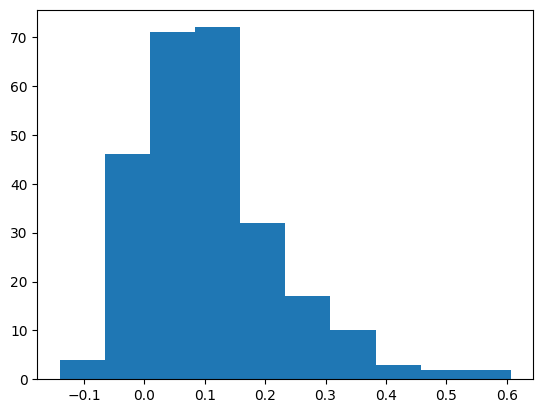

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(sim)

In [54]:

# def get_top_k_chunks(query, top_k=10):
#     model = SentenceTransformer('all-MiniLM-L6-v2')
#     chunk_texts = [" ".join(sents) for sents in clusters.values()]
#     chunk_embeddings = model.encode(chunk_texts)
#     # FAISS setup
#     dimension = chunk_embeddings.shape[1]
#     faiss_index = faiss.IndexFlatL2(dimension)  # or IndexFlatIP for cosine-like behavior
#     faiss_index.add(np.array(chunk_embeddings))

#     query_embedding = model.encode([query])
#     D, I = faiss_index.search(np.array(query_embedding), top_k)
#     return [chunk_texts[i] for i in I[0]]

## Loading LLM

In [56]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load the Mistral model & tokenizer
model_name = "mistralai/Mistral-7B-Instruct-v0.3"  # Replace with any open-access model
tokenizer = AutoTokenizer.from_pretrained(model_name)

llm_mistral = AutoModelForCausalLM.from_pretrained(
    model_name, torch_dtype=torch.float16, device_map="auto"
)

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [29]:
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch

# model_id = "google/gemma-7b-it"

# # Load tokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_id)

# # Load model in 4-bit quantization (needs bitsandbytes)
# model_gemma = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     device_map="auto",              # Automatically assigns layers to GPU
#     torch_dtype=torch.float16,      # Or use bfloat16 if Colab supports
#     load_in_4bit=True               # Enables low-memory mode
# )


## Generating  Response

In [60]:
def generate_response_mistral2(query, retrieved_chunks):
    """Use Mistral-7B to generate responses based on retrieved chunks."""
    context = "\n\n".join(retrieved_chunks)
    prompt = prompt = f"""
### Context:
{context}

### Task:
You are an intelligent assistant with a strong grasp of theoretical concepts, mathematical equations, and technical reasoning. Based on the following question, determine the most suitable response format dynamically. The response should be clear, structured, and tailored to the intent of the question.

Question: {query}

### Instructions:
- If the question is asking for a concept explanation, give a well-structured breakdown (definitions, key ideas, examples).
- If the question involves a comparison (e.g., "difference between", "compare X and Y"), use a Markdown table.
- If the question is about a formula or equation, explain each term, the full equation, and how it works in practice.
- If the question is something else (e.g., use case, how-to, reasoning), adapt the format accordingly for clarity.

Use formatting (like headers, lists, bullet points, or tables) **only if it enhances understanding**. Don't follow a fixed template—**use your judgment to present the best possible structured answer** for the given question.

### Response:
"""


    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = llm_mistral.generate(
            **inputs,
            max_new_tokens=1000,
            do_sample=True,
            temperature=0.7,
            top_k=50,
            top_p=0.95
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True).replace(prompt, "").strip()

In [83]:
query ="What is miller indices? how are they determined for crystal plane?"

retrieved_chunks,s,t = get_relevant_chunks(query)
final_response = generate_response_mistral2(query, retrieved_chunks)
print(final_response)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**Miller Indices**

Miller indices, named after the crystallographer William H. Miller, are a method for identifying crystal planes and directions in a crystal lattice. This system allows for the specification of planes and directions using integer values instead of fractions or other ratios.

**Determining Miller Indices for Crystal Planes**

To determine the Miller indices of a crystal plane, follow these steps:

1. Find the intercepts of the plane with the three crystal axes (a, b, and c) in fractional units.
2. Take the reciprocal of each intercept and change the sign if the intercept is negative.
3. Write the smallest set of three integers that represent the reciprocals.

**Example**

For the plane that intersects the axes at the points (1/2, 1/3, 2/4), the Miller indices are determined as follows:

1. Intercepts: (1/2, 1/3, 1/2)
2. Reciprocals: (2, 3, 2)
3. Smallest set of integers: 2, 3, 2

The Miller indices of this plane are then 232.

This system allows for easy identificatio

In [84]:
query ="Describe the steps to find the Miller indices for a plane in a cubic crystal."

retrieved_chunks,s,t = get_relevant_chunks(query)
final_response = generate_response_mistral2(query, retrieved_chunks)
print(final_response)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


To find the Miller indices for a plane in a cubic crystal, we can follow the steps below:

1. **Identify the Intercepts:**
   - Determine the intercepts of the plane with the three main crystal axes (x, y, z). These intercepts are usually denoted as a, b, c, where a, b, and c are the distances from the plane to the respective axes.

2. **Normalize the Intercepts:**
   - Normalize the intercepts by dividing each one by the smallest non-zero intercept value.

3. **Find the Reciprocal Values:**
   - Take the reciprocal values of the normalized intercepts. These reciprocal values are the Miller indices (h, k, l).

4. **Check the Sign:**
   - If the original intercepts had negative values, the corresponding Miller indices will have a negative sign.

Here's an example:

Suppose we have a plane that intersects the x, y, and z axes at distances 4, 3, and 2 units, respectively.

1. **Identify the Intercepts:**
   - a = 4, b = 3, c = 2

2. **Normalize the Intercepts:**
   - a' = 4 / 2 = 2, b' = 

In [85]:
query ="Why do equivalent planes have the same properties in a crystal? How are such planes represented?"

retrieved_chunks,s,t = get_relevant_chunks(query)
final_response = generate_response_mistral2(query, retrieved_chunks)
print(final_response)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**Why do equivalent planes have the same properties in a crystal?**

Equivalent planes in a crystal share the same properties because they have the same arrangement of atoms or molecules, resulting in similar bonding, electronic structures, and physical characteristics. This is due to the periodic nature of the lattice structure, where the atoms or molecules repeat in a pattern that gives rise to the formation of planes.

**How are such planes represented?**

In crystallography, planes are represented using the Miller indices (hkl) system. The indices are determined by finding the intercepts of the plane with the three crystal axes (a, b, c) and their reciprocals. The indices for a plane are given as hkl, where h, k, and l are integers that represent the distances of the intercepts along the a, b, and c axes, respectively.

The Miller indices system helps to simplify the representation of planes and allows for easy identification of families of planes with similar properties. For examp

In [86]:
query ="Discuss the challenges associated with tool wear and burr formation in micro machining. What strategies or technologies are used to mitigate these issues?"

retrieved_chunks,s,t = get_relevant_chunks(query)
final_response = generate_response_mistral2(query, retrieved_chunks)
print(final_response)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**Challenges associated with tool wear and burr formation in micro machining**

In micro machining, the challenges associated with tool wear and burr formation are significant due to the small dimensions and high precision requirements of the parts being machined.

1. **Tool wear**: Tool wear in micro machining is more severe than in conventional machining because of the increased contact area between the tool and the workpiece, and the smaller dimensions of the tool. Tool wear can lead to an increase in machining forces, errors in part dimensions, and reduced tool life.

   - **Adhesive wear**: This type of wear occurs when the tool and workpiece materials adhere to each other due to high contact pressures. This leads to material transfer from the workpiece to the tool, which can affect the tool's cutting edge and reduce its effectiveness.
   - **Abrasion wear**: This type of wear is caused by the erosion of the tool material due to the presence of hard particles in the workpiece or c

In [87]:
query ="Micro Electric Discharge Machining (Micro-EDM) and Micro Milling are two common micro machining techniques. Compare their applications, advantages, and limitations, particularly in the context of fabricating micro features in hard materials."

retrieved_chunks,s,t = get_relevant_chunks(query)
final_response = generate_response_mistral2(query, retrieved_chunks)
print(final_response)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**Comparison of Micro-EDM and Micro Milling in Fabricating Micro Features in Hard Materials**

**Applications**

| **Micro-EDM** | **Micro Milling** |
| --- | --- |
| Micro-EDM is primarily used for the machining of hard, brittle, and electrically conductive materials. It is often used in the production of micro-electromechanical systems (MEMS), micro-molds, and micro-components for the electronics industry. | Micro Milling is used for the machining of a wide range of materials, including metals, plastics, and ceramics. It is often used in the production of micro-molds, micro-components, and micro-parts for various industries, such as automotive, aerospace, and medical. |

**Advantages**

| **Micro-EDM** | **Micro Milling** |
| --- | --- |
| Micro-EDM can machine hard, brittle, and electrically conductive materials that are difficult to machine using other methods. It allows for high precision and smooth surfaces, even on complex geometries. It can also machine materials without the ne